# Lab  #2

Student Name: Rayyan Bilal

Student ID: 501053067

Video demo: https://youtu.be/WUlAoALTP8w


**Creating x and y values for 30,000 samples:**

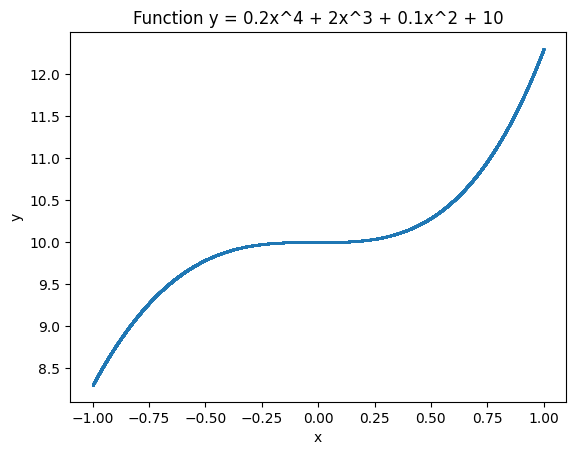

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

def generate_samples():
    np.random.seed(42)  # Setting a seed for reproducibility

    # Generate 30,000 random samples for x between -1 and 1
    x = np.random.uniform(low=-1, high=1, size=(30000,))

    # Calculate the corresponding y values using the given function
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

    return x, y

def get_dataset(shuffle_data=True):
    x, y = generate_samples() # Generates Data for x and y

    if shuffle_data:
        # Shuffle the data
        indices = np.arange(len(x))
        np.random.shuffle(indices)
        x = x[indices]
        y = y[indices]

    return x, y

def shuffle_data(x, y):
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    return x[indices], y[indices]

x, y = get_dataset(shuffle_data=False)  # Data without shuffling

# Plot the function
plt.scatter(x, y, s=1, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function y = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.show()

**Function to split data into train, validation, and test sets:**

In [ ]:
def split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios should sum up to 1.0"
    assert len(x) == len(y), "Data arrays should have the same length"

    data_length = len(x)
    train_size = int(train_ratio * data_length)
    val_size = int(val_ratio * data_length)

    x_train = x[:train_size]
    y_train = y[:train_size]

    x_val = x[train_size:train_size+val_size]
    y_val = y[train_size:train_size+val_size]

    x_test = x[train_size+val_size:]
    y_test = y[train_size+val_size:]

    return x_train, y_train, x_val, y_val, x_test, y_test

In [ ]:
x, y = get_dataset(shuffle_data=True)
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Print the sizes of the split datasets
print("Train set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Test set size:", len(x_test))

Train set size: 9000
Validation set size: 6000
Test set size: 15000


**Function to Calculate Metrics:**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2

# Actual target values
y_true = [1.2, 2.4, 3.6, 4.8, 6.0]

# Predicted values
y_pred = [1.0, 2.2, 3.8, 4.6, 5.8]

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_true, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

Mean Absolute Error (MAE): 0.200
Mean Squared Error (MSE): 0.040
Root Mean Squared Error (RMSE): 0.200
R2 Score: 0.986


# **Implementing Cases Using Keras Library for shuffled data:**

# Case 1:

Data: Shuffled and Unscaled

NN Structure: Structure 1

Activation Function: Relu




Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 26.8906 - val_loss: 0.2055
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1085 - val_loss: 0.0460
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0259 - val_loss: 0.0114
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 9.911

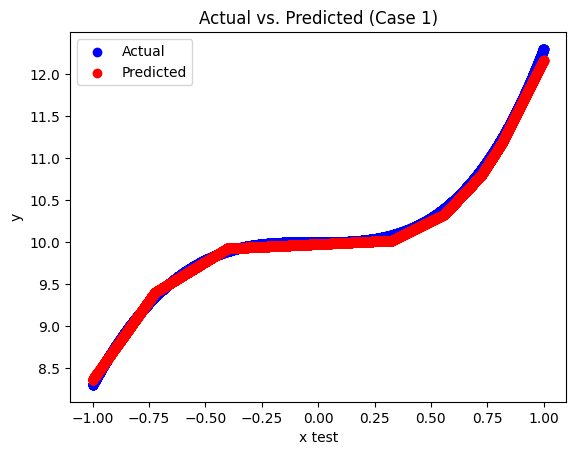

In [ ]:

# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 1)')
plt.legend()
plt.show()

# Case 2:

Data: Shuffled and Unscaled

NN Structure: Structure 2

Activation Function: Relu

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 38.9894 - val_loss: 0.2569
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1081 - val_loss: 0.0868
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0775 - val_loss: 0.0648
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0584 - val_loss: 0.0506
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0489 - val_loss: 0.0454
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0464 - val_loss: 0.0442
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0460 - val_loss: 0.0441
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0459 - val_loss: 0.0441
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0457 - val_loss: 0.0452
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0459 - val_loss: 0.044

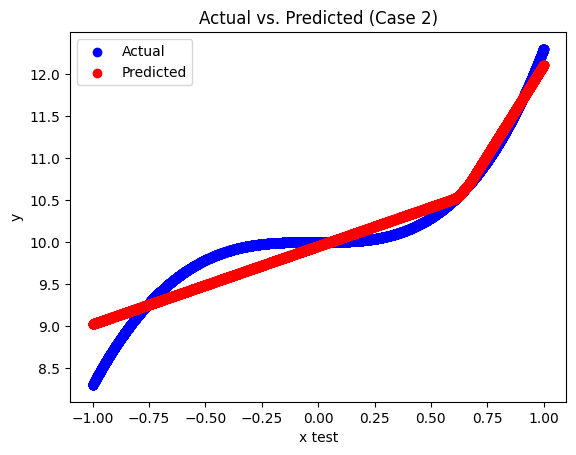

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 2)')
plt.legend()
plt.show()


# Case 3:

Data: Shuffled and Unscaled

NN Structure: Structure 1

Activation Function: Tanh


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 43.1478 - val_loss: 18.3223
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 9.5905 - val_loss: 3.9345
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 1.9215 - val_loss: 0.8657
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6568 - val_loss: 0.5747
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4891 - val_loss: 0.3074
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2541 - val_loss: 0.2149
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1810 - val_loss: 0.1489
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0955 - val_loss: 0.0558
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0352 - val_loss: 0.0224
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0148 - val_loss: 0.00

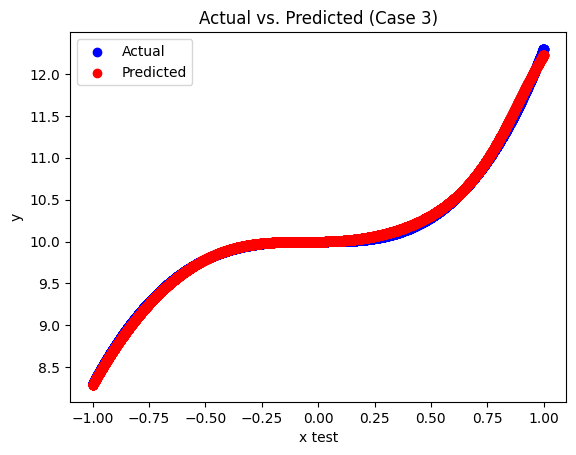

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 3)')
plt.legend()
plt.show()


# Case 4:

Data: Shuffled and scaled data. The data was firstly shuffled then split and then scaled for both x and y

NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.0222 - val_loss: 0.0058
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 9.7453e-04 - val_loss: 6.2434e-04
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 4.2912e-04 - val_loss: 3.8872e-04
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 3.0713e-04 - val_loss: 2.3666e-04
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 2.7820e-04 - val_loss: 2.2170e-04
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 2.8435e-04 - val_loss: 2.8131e-04
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 2.5803e-04 - val_loss: 2.6736e-04
Epoch 10/20
750/750 [==============================]

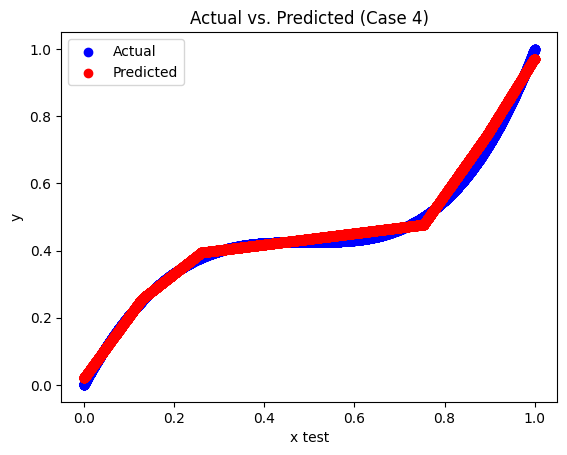

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Generate the shuffled and scaled dataset
x, y = get_dataset(shuffle_data=True)

#shuffle data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_val = scaler.transform(x_val.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 4)')
plt.legend()
plt.show()

# Case 5:

 Data: Shuffled and scaled data. The data was firstly shuffled then split and then scaled for both x and y

 NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0213 - val_loss: 0.0074
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0060 - val_loss: 0.0055

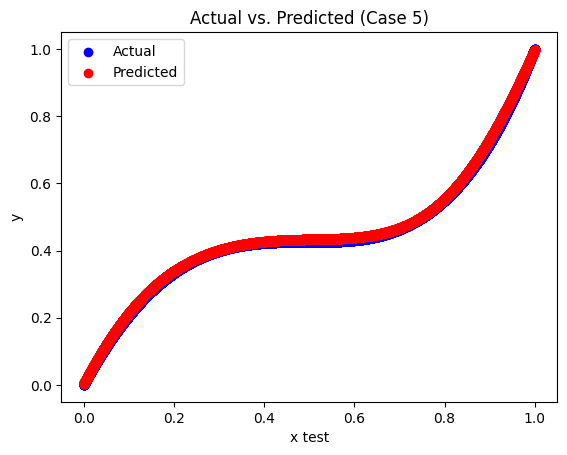

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Generate the shuffled and scaled dataset
x, y = get_dataset(shuffle_data=True)

# Shuffle the data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_val = scaler.transform(x_val.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 5)')
plt.legend()
plt.show()


#**Implementing Cases Using Keras Library for Unshuffled Data Set:**

#Case 1:

  Data: Unshuffled and Unscaled

  NN Structure: Structure 1

  Activation Function: Relu




Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 26.1183 - val_loss: 0.1344
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0581 - val_loss: 0.0188
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0090 - val_loss: 0.0038
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.001

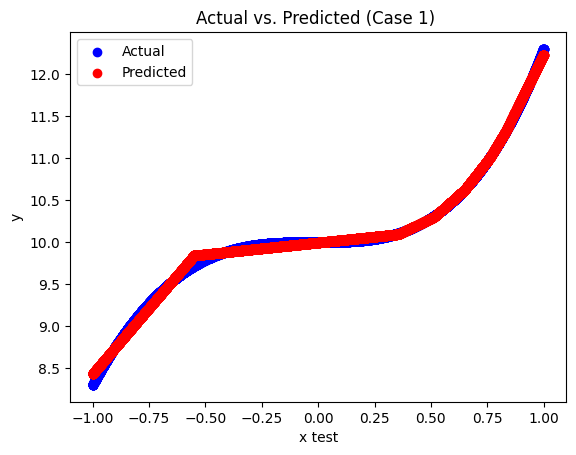

In [ ]:

# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 1) ')
plt.legend()
plt.show()

# Case 2:

  Data: Unshuffled and Unscaled

  NN Structure: Structure 2

 Activation Function: Relu

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 34.0523 - val_loss: 0.1525
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0911 - val_loss: 0.0754
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0649 - val_loss: 0.0576
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0539 - val_loss: 0.0519
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0512 - val_loss: 0.0512
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0507 - val_loss: 0.0506
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0500 - val_loss: 0.0499
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0498 - val_loss: 0.0509
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0489 - val_loss: 0.0495
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0487 - val_loss: 0.048

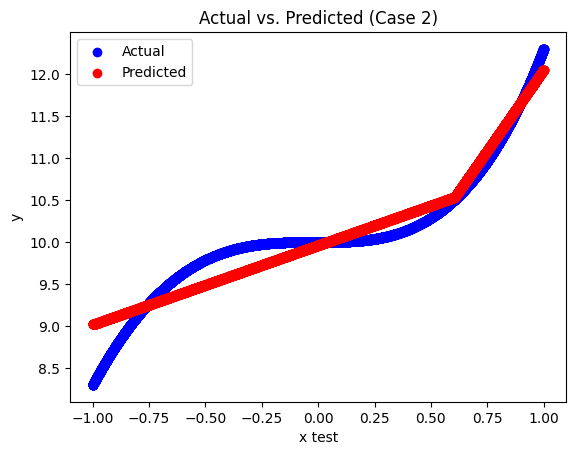

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 2)')
plt.legend()
plt.show()


# Case 3:

 Data: Unshuffled and Unscaled

 NN Structure: Structure 1

 Activation Function: Tanh


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 56.9016 - val_loss: 29.4882
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 16.7985 - val_loss: 8.1103
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 4.1028 - val_loss: 1.7653
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.9920 - val_loss: 0.6670
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5921 - val_loss: 0.5850
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4658 - val_loss: 0.2907
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2242 - val_loss: 0.1972
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1642 - val_loss: 0.1402
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0915 - val_loss: 0.0518
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0287 - val_loss: 0.0

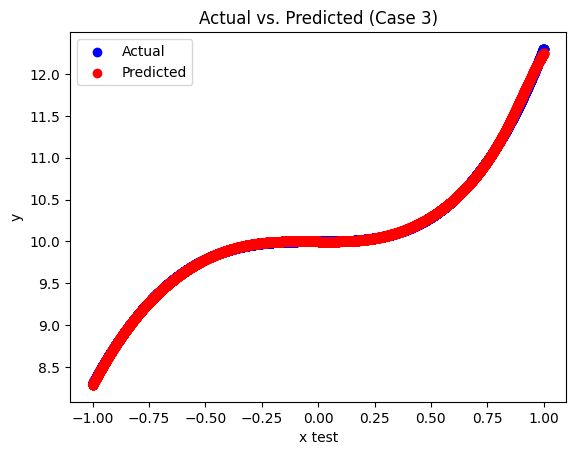

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 3)')
plt.legend()
plt.show()


# Case 4:

 Data: Unshuffled and Unscaled

  NN Structure: Structure 1

  Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0834 - val_loss: 0.0368
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0362 - val_loss: 0.0359
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0361 - val_loss: 0.0359
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0361 - val_loss: 0.0359
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0361 - val_loss: 0.0359
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0361 - val_loss: 0.0359
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0361 - val_loss: 0.0359
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0361 - val_loss: 0.0359
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0361 - val_loss: 0.0359
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0361 - val_loss: 0.0359

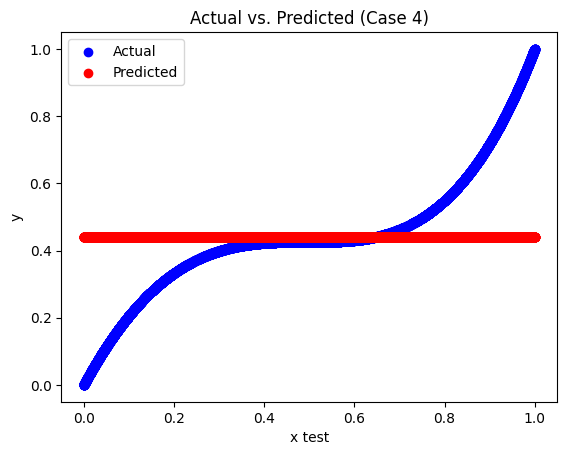

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Generate the shuffled and scaled dataset
x, y = get_dataset(shuffle_data=True)

#shuffle data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_val = scaler.transform(x_val.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 4)')
plt.legend()
plt.show()

# Case 5:

 Data: Shuffled and scaled data. The data was firstly shuffled then split and then scaled for both x and y

 NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.0067
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 9/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0063 - val_loss: 0.0061

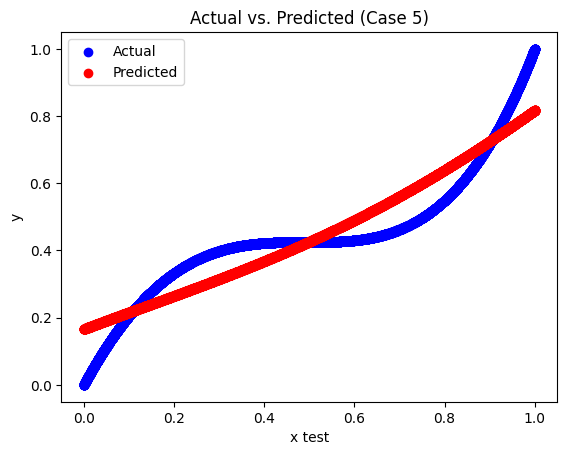

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Generate the shuffled and scaled dataset
x, y = get_dataset(shuffle_data=False)

# Shuffle the data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_val = scaler.transform(x_val.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 5)')
plt.legend()
plt.show()
